# Structured relational data model

The given zip file has 4 csv files (4 entities)
- brands.csv (Has details related to each brand)
- users.csv (Has details related to users and their signup methods)
- receipt_items.csv (Has details related to each item which has receipt)
- receipts.csv (Has details related to receipts, and multiple timestamps corresponding to receipt generation etc;)

The below is the pictorial representation(class diagram) of the Relational data model. Primary keys are underlined
- User_ID in receipts is foreign key connecting Receipts to Users
- Rewards_Receipt_ID is the foreign key connecting Receipt_Items to Receipts
- Brand_Code is the foreign key connecting Receipt_Items to Brands

**Note:** I am not able to correlate with 100% on the relationship for the table Brands. So, I made an assumption that it is somehow connected to Receipt Items because of very similar column names (BarCode and Brand_Code)

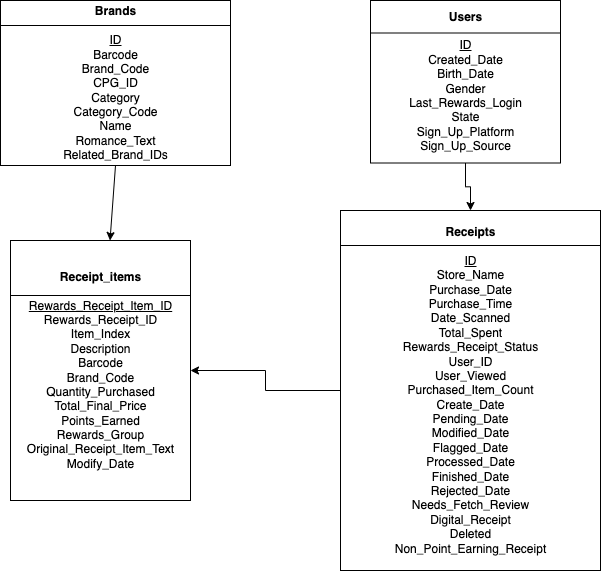

In [1]:
import pandas as pd
import json
import sqlite3

## Saving the csv files to json files

In [2]:
df = pd.read_csv('brands.csv')
df.to_json('brands.json')

In [3]:
df = pd.read_csv('receipts.csv')
df.to_json('receipts.json')

In [4]:
df = pd.read_csv('receipt_items.csv')
df.to_json('receipt_items.json')

In [5]:
df = pd.read_csv('users.csv')
df.to_json('users.json')

## Small script to convert the JSON file to Database

- Name of the Database is fetch.db and created 4 tables corresponding to 4 csv files

In [7]:
# Open JSON data
with open("brands.json") as f:
    data = json.load(f)

# Create A DataFrame From the JSON Data
df = pd.DataFrame(data)

conn = sqlite3.connect("fetch.db")
c = conn.cursor()

df.to_sql("brands",conn)

406

In [8]:
# Open JSON data
with open("receipt_items.json") as f:
    data = json.load(f)

# Create A DataFrame From the JSON Data
df = pd.DataFrame(data)

conn = sqlite3.connect("fetch.db")
c = conn.cursor()

df.to_sql("receipt_items",conn)

360377

In [9]:
# Open JSON data
with open("receipts.json") as f:
    data = json.load(f)

# Create A DataFrame From the JSON Data
df = pd.DataFrame(data)

conn = sqlite3.connect("fetch.db")
c = conn.cursor()

df.to_sql("receipts",conn)

70601

In [10]:
# Open JSON data
with open("users.json") as f:
    data = json.load(f)

# Create A DataFrame From the JSON Data
df = pd.DataFrame(data)

conn = sqlite3.connect("fetch.db")
c = conn.cursor()

df.to_sql("users",conn)

164

## Question 2.5

### How many users scanned in each month?

**Approach:** I've taken receipts table in which we have Date_Scanned column. From there, I used `strftime()` method
to extract the month. And all I did is to get the count of distinct user ids based on the months.

**Output:** It's a tuple where the first value corresponds to month (Jan-Dec) and the 2nd value refers to the number of customers in that particular month

In [60]:
conn = sqlite3.connect("fetch.db")
c = conn.cursor()
c.execute('SELECT strftime("%m", DATE_SCANNED) as "Month",' + 
        'COUNT(DISTINCT(user_ID)) as "User ID" FROM receipts ' + 
        'GROUP BY strftime("%m", DATE_SCANNED);')
c.fetchall()

[('01', 97),
 ('02', 87),
 ('03', 89),
 ('04', 90),
 ('05', 88),
 ('06', 88),
 ('07', 88),
 ('08', 88),
 ('09', 88),
 ('10', 91),
 ('11', 93),
 ('12', 98)]

## Question 2.2

### Which user spent the most money in the month of August?

**Approach:** I used users table and joined on receipt table based on the primary-foreign key relationship. Once that is done, I checked the Purchase_Date column and extracted month using `strftime()` and filtered out the receipts which are present only in the month of August. Then I grouped based on users and added the total spent column for each user. At the end, I ordered in descending the the first user ID is the one who has spent the most in the month of August

**Output:** The user with ID `609ab37f7a2e8f2f95ae968f` spent the most amount i.e `$157739.13999999998`

In [61]:
conn = sqlite3.connect("fetch.db")
c = conn.cursor()
c.execute('SELECT users.ID, SUM(TOTAL_SPENT) as "Total",' + 
          'PURCHASE_DATE FROM users JOIN receipts ON users.id=receipts.user_id WHERE ' + 
          'strftime("%m",PURCHASE_DATE)="08" GROUP BY users.ID ORDER BY total DESC LIMIT 1;')
c.fetchall()

[('609ab37f7a2e8f2f95ae968f', 157739.13999999998, '2022-08-18T00:00:00Z')]

## Question 3

### Quick insights to a non-technical stakeholder

There are 32 distinct categories that are using the product. We can quickly visualize them and understand which categories are using the product and focus on the less frequent categories


In [65]:
conn = sqlite3.connect("fetch.db")
c = conn.cursor()
c.execute('SELECT COUNT(DISTINCT(category_code)) FROM brands;')
c.fetchall()

[(32,)]

We can quickly have a glance/visualize and see which genders are using the product and focus on some points to promote diversity and inclusitivity.

In [72]:
conn = sqlite3.connect("fetch.db")
c = conn.cursor()
c.execute('SELECT COUNT(DISTINCT(id)), gender FROM users GROUP BY gender;')
c.fetchall()

[(41, 'female'), (35, 'male'), (47, 'prefer_not_to_say'), (41, 'transgender')]

We can also have a glance/visualize and see which states are using the product and focus on some points to increase the reach of the product to less represented states

In our case, Florida has highest distinct users

In [73]:
conn = sqlite3.connect("fetch.db")
c = conn.cursor()
c.execute('SELECT COUNT(DISTINCT(id)) as "Frequency", state FROM users GROUP BY state ORDER BY Frequency DESC;')
c.fetchall()

[(16, 'FL'),
 (15, 'NY'),
 (12, 'PA'),
 (11, 'TX'),
 (11, 'CA'),
 (9, 'NC'),
 (7, 'GA'),
 (6, 'SC'),
 (6, 'NJ'),
 (5, 'PR'),
 (5, 'OH'),
 (5, 'MN'),
 (5, 'MI'),
 (5, 'AZ'),
 (4, 'WV'),
 (4, 'VA'),
 (4, 'TN'),
 (4, 'IL'),
 (3, 'WI'),
 (3, 'CT'),
 (2, 'UT'),
 (2, 'RI'),
 (2, 'MS'),
 (2, 'KY'),
 (2, 'IN'),
 (2, 'IA'),
 (2, 'AL'),
 (1, 'WA'),
 (1, 'NV'),
 (1, 'NH'),
 (1, 'ND'),
 (1, 'MO'),
 (1, 'MD'),
 (1, 'MA'),
 (1, 'LA'),
 (1, 'AR'),
 (1, 'AK')]